# Hierarchical clustering Analysis of Qualitatives variables (VARQUALHCA)

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
vote = pd.read_excel("vote_clustering.xlsx")
vote.head()


,affiliation,budget,physician,salvador,nicaraguan,missile,education
0,republican,n,y,y,n,n,y
1,republican,n,y,y,n,n,y
2,democrat,y,neither,y,n,n,n
3,democrat,y,n,neither,n,n,n
4,democrat,y,n,y,n,n,neither


In [2]:
#variables actives
X = vote.iloc[:,1:]
print(X.columns)

Index(['budget', 'physician', 'salvador', 'nicaraguan', 'missile',
       'education'],
      dtype='object')


In [3]:
# Importation de la fonction
from scientisttools.clustering import CATVARHCA
from scientisttools.pyplot import plot_dendrogram
import matplotlib.pyplot as plt
# Set figure size
plt.rcParams['figure.figsize'] = [16,16]

### CAH sur les variables : V de Cramer

#### Matrice originale

In [4]:
catvarhca = CATVARHCA(n_clusters=2,
                         var_labels=list(X.columns),
                         diss_metric="cramer",
                         matrix_type="completed",
                         metric="euclidean",
                         method="ward",
                         parallelize=True)

catvarhca.fit(X)

CATVARHCA(n_clusters=2, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [5]:
catvarhca.diss_matrix_

,budget,physician,salvador,nicaraguan,missile,education
budget,0.000000,0.360782,0.493170,0.482666,0.561172,0.524634
physician,0.360782,0.000000,0.423504,0.482176,0.528899,0.491124
salvador,0.493170,0.423504,0.000000,0.388881,0.442139,0.530398
nicaraguan,0.482666,0.482176,0.388881,0.000000,0.454786,0.531160
missile,0.561172,0.528899,0.442139,0.454786,0.000000,0.573338
education,0.524634,0.491124,0.530398,0.531160,0.573338,0.000000


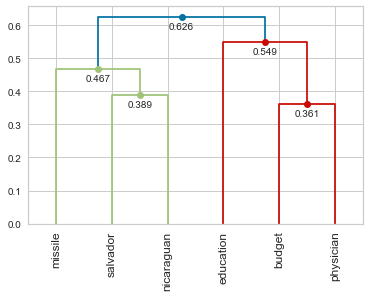

In [6]:
plot_dendrogram(catvarhca,orientation='top',leaf_rotation=90,color_threshold=0.6)
plt.show()

In [7]:
# Positionner les variables supplémentaires
Xsup =  vote.iloc[:,0]
catvarhca.transform(Xsup)

,affiliation
cluster,
cluster_1,0.780505
cluster_2,0.666967


#### Matrice Disjonctif

In [8]:
disj = pd.get_dummies(X,prefix_sep='_',drop_first=False)
catvarhca2 = CATVARHCA(n_clusters=2,
                         var_labels=list(X.columns),
                         diss_metric="cramer",
                         matrix_type="disjonctif",
                         metric="euclidean",
                         method="ward",
                         parallelize=True)

catvarhca2.fit(disj)

CATVARHCA(matrix_type='disjonctif', n_clusters=2, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [9]:
catvarhca2.diss_matrix_

,budget,physician,salvador,nicaraguan,missile,education
budget,0.000000,0.360782,0.493170,0.482666,0.561172,0.524634
physician,0.360782,0.000000,0.423504,0.482176,0.528899,0.491124
salvador,0.493170,0.423504,0.000000,0.388881,0.442139,0.530398
nicaraguan,0.482666,0.482176,0.388881,0.000000,0.454786,0.531160
missile,0.561172,0.528899,0.442139,0.454786,0.000000,0.573338
education,0.524634,0.491124,0.530398,0.531160,0.573338,0.000000


Les matrices de dissimilarité sont identiques

In [10]:
Xsupdisj = pd.get_dummies(Xsup,prefix=Xsup.name,prefix_sep='_',drop_first=False)
catvarhca2.transform(Xsupdisj)

,affiliation
cluster,
cluster_1,0.780505
cluster_2,0.666967


### CAH sur les modalités : Indice de Dice

#### Matrice originale

In [11]:
catvarhca3 = CATVARHCA(n_clusters=3,
                         var_labels=list(X.columns),
                         diss_metric="dice",
                         matrix_type="completed",
                         metric="euclidean",
                         method="ward",
                         parallelize=True)

catvarhca3.fit(X)

CATVARHCA(diss_metric='dice', n_clusters=3, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [12]:
catvarhca3.diss_matrix_.iloc[:5,:5]

,budget_n,budget_neither,budget_y,physician_n,physician_neither
budget_n,0.000000,9.539392,14.560220,13.564660,9.539392
budget_neither,9.539392,0.000000,11.489125,11.224972,2.236068
budget_y,14.560220,11.489125,0.000000,5.567764,11.269428
physician_n,13.564660,11.224972,5.567764,0.000000,11.357817
physician_neither,9.539392,2.236068,11.269428,11.357817,0.000000


In [13]:
catvarhca3.cluster_infos_

,n(k),p(k)
cluster,,
cluster_1,6,0.333333
cluster_2,6,0.333333
cluster_3,6,0.333333


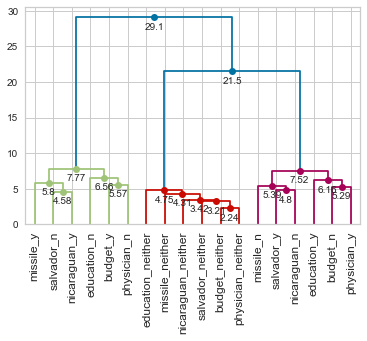

In [14]:
plot_dendrogram(catvarhca3,orientation='top',leaf_rotation=90,color_threshold=10)

In [15]:
catvarhca3.cluster_

,cluster
budget_n,cluster_1
budget_neither,cluster_2
budget_y,cluster_3
physician_n,cluster_3
physician_neither,cluster_2
physician_y,cluster_1
salvador_n,cluster_3
salvador_neither,cluster_2
salvador_y,cluster_1
nicaraguan_n,cluster_1


In [16]:
catvarhca3.cluster_infos_

,n(k),p(k)
cluster,,
cluster_1,6,0.333333
cluster_2,6,0.333333
cluster_3,6,0.333333


In [17]:
# Position de la variable supplémentaire
catvarhca3.transform(Xsup)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,186.583333,30.916667
cluster_2,130.916667,86.583333
cluster_3,33.500000,184.000000


#### Tableau disjonctif complet

In [18]:
catvarhca4 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="dice",
                       matrix_type="disjonctif",
                       metric="euclidean",
                       method="ward",
                       parallelize=True)
# Instanciation
catvarhca4.fit(disj)

CATVARHCA(diss_metric='dice', matrix_type='disjonctif', n_clusters=3,
          parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [19]:
# Projection de la variable supplémentaire
catvarhca4.transform(Xsupdisj)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,186.583333,30.916667
cluster_2,130.916667,86.583333
cluster_3,33.500000,184.000000


### CAH sur les modalités : bothpos

#### Matrice originale

In [20]:
catvarhca5 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="bothpos",
                       matrix_type="completed",
                       metric="euclidean",
                       method="ward",
                       parallelize=True)
# Instanciation
catvarhca5.fit(X)

CATVARHCA(diss_metric='bothpos', n_clusters=3, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

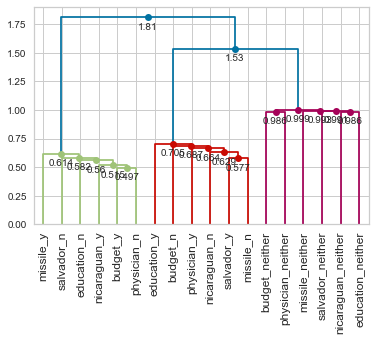

In [21]:
plot_dendrogram(catvarhca5,orientation='top',leaf_rotation=90)

In [22]:
# Position de la variable supplémentaire
catvarhca5.transform(Xsup)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,0.908429,0.664368
cluster_2,0.973946,0.985824
cluster_3,0.503831,0.963602


#### Matrice disjonctif

In [23]:
catvarhca6 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="bothpos",
                       matrix_type="disjonctif",
                       metric="euclidean",
                       method="ward",
                       parallelize=True)
# Instanciation
catvarhca6.fit(disj)

CATVARHCA(diss_metric='bothpos', matrix_type='disjonctif', n_clusters=3,
          parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [24]:
# Position de la variable supplémentaire
catvarhca6.transform(Xsupdisj)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,0.908429,0.664368
cluster_2,0.973946,0.985824
cluster_3,0.503831,0.963602
